# Q1
<img src='./picture_source/HW_4_1.PNG' width='500px' align='middle'>

# Answer

In [1]:
# import packages needed
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
# prepare the data
# create original dataframe
data_FRB = pd.DataFrame({
    'Year':[i for i in range(72, 87, 1)],
    'Capital':[1209188, 1330372, 1157371, 1070860, 1233475, 1355769, 1351667, 1326248, 1089545, 1111942,
              988165, 1069651, 1191677, 1246536, 1281262],
    'Labor':[1259142, 1371795, 1263084, 1118226, 1274345, 1369877, 1451595, 1328683, 1077207, 1056231, 947502,
            1057159, 1169442, 1195255, 1171664],
    'Value_Added':[11150.0, 12853.6, 10450.8, 9318.3, 12097.7, 12844.8, 13309.9, 13402.3, 8571.0, 8739.7,
                  8140.0, 10958.4, 10838.9, 10030.5, 10836.5]
})

# append 'log_Value_Added' as Value_added with log function applied
data_FRB.loc[:, 'log_Value_Added'] = np.log(data_FRB.loc[:, 'Value_Added'])

# divide data into X and y
X = data_FRB.iloc[:, 1:-2]
y = data_FRB.iloc[:, -1]

   Year  Capital    Labor  Value_Added  log_Value_Added
0    72  1209188  1259142      11150.0         9.319195
1    73  1330372  1371795      12853.6         9.461379
2    74  1157371  1263084      10450.8         9.254434
3    75  1070860  1118226       9318.3         9.139735
4    76  1233475  1274345      12097.7         9.400771


In [ ]:
# train with multiple regression


# create a statsmodel
# create statsmodels model
model = sm.regression.linear_model.OLS(y, X)

for i, j in enumerate(lambda_list):
    result_LASSO = model.fit_regularized(L1_wt=L1_wt, alpha=float(j))
    predict_list_original = result_LASSO.fittedvalues.tolist()
    mse_value = mean_squared_error(y, predict_list_original)
    print('MSE when lambda=', j, 
      'is: ', mse_value)


# Q2
<img src='./picture_source/HW_4_2.PNG' width='500px' align='middle'>

# Answer
#### (a) 根據我的程式碼，Lambda在越小時，MSE同有下降的趨勢，並在Lambda=0.0時達到最小，MSE=1.8042175649346816e-08；使用stepwise regression得到MSE=0.014399127818860755為；相比較發現stepwise regression方法的預測效率較佳
#### (b) 如本題最下方程式碼所產生的圖所示。

In [1]:
# import packages needed 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
# prepare the data
ORL_data = pd.read_csv('./data/ORL_data.csv')
# divide into X and y
X = ORL_data.iloc[:, :-1]
y = ORL_data.iloc[:, -1].tolist()

In [6]:
# implement with Lasso regression (with sklearn package)

lambda_list = np.arange(0, 10.1, 0.1)
mse_list = []

for i, j in enumerate(lambda_list):
    reg_lasso = linear_model.Lasso(alpha=j)
    reg_lasso.fit(X, y)
    predict_list_original = reg_lasso.predict(X).tolist()
    mse_list.append(mean_squared_error(y, predict_list_original))
    
minimum_value = np.min(mse_list)
minimum_index_list = [i for i, j in enumerate(mse_list) if j == minimum_value]
# print(mse_list)
# print(minimum_index_list)
print('MSE is lowest when lambda=', lambda_list[minimum_index_list[0]], 
      ', while MSE is ', mse_list[minimum_index_list[0]])

C:\Users\ricardo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\ricardo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\ricardo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025962355545366744, tolerance: 0.004375
  positive)


MSE is lowest when lambda= 0.0 , while MSE is  1.8042175649346816e-08


In [7]:
# implement with Ridge regression (with sklearn package)
lambda_list = np.arange(0, 10.1, 0.1)
mse_list = []

for i, j in enumerate(lambda_list):
    reg_ridge = linear_model.Ridge(alpha=j)
    reg_ridge.fit(X, y)
    predict_list_original = reg_ridge.predict(X).tolist()
    mse_list.append(mean_squared_error(y, predict_list_original))
    
minimum_value = np.min(mse_list)
minimum_index_list = [i for i, j in enumerate(mse_list) if j == minimum_value]
# print(mse_list)
# print(minimum_index_list)
print('MSE is lowest when lambda=', lambda_list[minimum_index_list[0]], 
      ', while MSE is ', mse_list[minimum_index_list[0]])

C:\Users\ricardo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.20387e-19): result may not be accurate.
  overwrite_a=False)


MSE is lowest when lambda= 0.0 , while MSE is  3.033838863451482e-29


In [11]:
# To compare with stepwise regression, we select LASSO regression with lambda = 0, 0.001, and 1
# We use statsmodels package this time.
# Reference:
# Documentation of penalized (regularized) regression in statsmodels (Elastic Net)
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

lambda_list = [0, 0.001, 1]
L1_wt = 1 # 1 when LASSO fit, 0 when ridge fit

# create statsmodels model
model = sm.regression.linear_model.OLS(y, X)

for i, j in enumerate(lambda_list):
    result_LASSO = model.fit_regularized(L1_wt=L1_wt, alpha=float(j))
    predict_list_original = result_LASSO.fittedvalues.tolist()
    mse_value = mean_squared_error(y, predict_list_original)
    print('MSE when lambda=', j, 
      'is: ', mse_value)

MSE when lambda= 0 is:  0.03492422008163612
MSE when lambda= 0.001 is:  0.034903909423569794
MSE when lambda= 1 is:  0.06668417375325184


In [14]:
# create stepwise regression function

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """ Perform a forward-backward feature selection
    Reference: # https://www.twblogs.net/a/5c13a86fbd9eee5e40bb7431
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)

    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included].values))).fit()
            print('R_square = ', model.rsquared)
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()  # null if pvalues is empty
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues.idxmax()
                included.remove(included[worst_feature])
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
    return included

In [ ]:
# implement stepwise regression model
included_features = stepwise_selection(X, y)
print('resulting features:')
print(included_features)
print('Number of included feincluded_featurees is: ', len(included_features))

C:\Users\ricardo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  pixel_1470                     with p-value 3.91841e-14
R_square =  0.13404309865692476
Add  pixel_2488                     with p-value 3.38413e-16
R_square =  0.2678723779962152
Add  pixel_2271                     with p-value 6.02768e-11
R_square =  0.34298316156352904
Add  pixel_1722                     with p-value 7.004e-08
R_square =  0.38964653438298524
Add  pixel_555                      with p-value 1.31884e-07
R_square =  0.4313340061910136
Add  pixel_1474                     with p-value 5.65748e-06
R_square =  0.46041103180240095
Add  pixel_1386                     with p-value 8.20976e-06
R_square =  0.48713763178062175
Add  pixel_1476                     with p-value 6.706e-07
R_square =  0.5185697594190422
Add  pixel_1051                     with p-value 6.99533e-06
R_square =  0.5428944164631441
Add  pixel_1561                     with p-value 1.92879e-05
R_square =  0.5638799029382524
Add  pixel_202                      with p-value 1.4955e-05
R_square =  0.58447

In [9]:
# create new_dataset with feature selected
included_features = ['pixel_1470', 'pixel_2488', 'pixel_2271', 'pixel_1722', 'pixel_555', 'pixel_1474', \
 'pixel_1386', 'pixel_1476', 'pixel_1051', 'pixel_1561', 'pixel_202', 'pixel_133',  \
 'pixel_1687', 'pixel_319', 'pixel_2393', 'pixel_1984', 'pixel_1325', 'pixel_325', 'pixel_1730', \
 'pixel_546', 'pixel_380', 'pixel_183', 'pixel_95', 'pixel_1180', 'pixel_2158', 'pixel_2208', 'pixel_2168', \
 'pixel_1935', 'pixel_2117', 'pixel_430', 'pixel_2516', 'pixel_1260 ', 'pixel_1809', 'pixel_1565', 'pixel_845', \
 'pixel_1366', 'pixel_414', 'pixel_2121', 'pixel_1936']


# prepare the data
X = ORL_data[ORL_data.columns & included_features]
# included_featuresde into X and y
y = ORL_data.iloc[:, -1].tolist()
# calculate mse with features selected by stepwise regression
reg = linear_model.LinearRegression()
reg.fit(X, y)
predict_list = reg.predict(X)
mse_value = mean_squared_error(y, predict_list)
print('MSE=', mse_value)

MSE= 0.014399127818860755


In [13]:
# Implement LASSO model when setting lambda=1
result_LASSO = model.fit_regularized(L1_wt=1, alpha=1)
predict_list_original = result_LASSO.fittedvalues.tolist()
mse_value = mean_squared_error(y, predict_list_original)
print('MSE when lambda=', j, 'is: ', mse_value)

# interpret the result of LASSO
param_data_LASSO = pd.DataFrame({
    'Pixel':result_LASSO.params.index.tolist(),
    'Params':result_LASSO.params.values.tolist()
})

param_data_LASSO = param_data_LASSO.sort_values(by=['Params'], ascending=False)
chosen_vars_LASSO = param_data_LASSO.iloc[0:54, 0].values.tolist()

MSE when lambda= 1 is:  0.06668417375325184


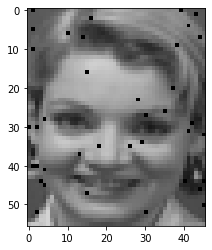

In [14]:
# Interpret and plot the result
pixel_list_number = []
pixel_list_x = []
pixel_list_y = []
# transform back to pixel
for i, j in enumerate(chosen_vars_LASSO):
    value = int(j[6:])
    row = value / 46 - 1
    column = value % 46 - 1
    pixel_list_number.append(value)
    pixel_list_x.append(row)
    pixel_list_y.append(column)
    file = "./data/ORL_Faces_Classified/0/1_1.png"
    sample = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    for i, j in enumerate(pixel_list_x):
        x_value = int(j - 1)
        y_value = int(pixel_list_y[i] - 1)
        sample[x_value, y_value] = 0
# cv2.imwrite( "./sample.png", sample)
imgplot = plt.imshow(sample, cmap='gray', vmin=0, vmax=255)
plt.show()

# Q3
<img src='./picture_source/HW_4_3.PNG' width='500px' align='middle'>

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [22]:
def PCA_decomposition(X, isCorrMX):
    # Reference: https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
    # calculate mean of the array
    X_mean = np.mean(X.T, axis=1)
    # center the values
    X_center = X - X_mean
    # check if use Correlation Matrix
    if isCorrMX == True:
        X_covariance = np.corrcoef(X_center.T)
    else:
        X_covariance = np.cov(X_center.T)
    # calculate eigenvalues and eigenvectors
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
    eigenvalues, eigenvectors = np.linalg.eig(X_covariance)
    X_project = -(eigenvectors.T.dot(X_center.T).T)
    return eigenvalues, eigenvectors, X_project

In [23]:
# test PCA function

X = np.array([[1, 1], [0, 1], [-1, 0], [3, 3], [4, 3], [5, 4]])

# eigenvalues, eigenvectors, X_project = PCA_decomposition(X, True)
eigenvalues, eigenvectors, X_project = PCA_decomposition(X, False)
print(eigenvalues)
print()
print(eigenvectors)
print()
print(X_project)

[7.93954312 0.06045688]

[[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


In [ ]:
# implement PCA with AutoMPG dataset

AutoMPG = pd.read_csv('./data/AutoMPG.csv')
eigenvalues, eigenvectors, AutoMPG_project = PCA_decomposition(AutoMPG, False)


# Q4
<img src='./picture_source/HW_4_4.PNG' width='500px' align='middle'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
ORL_data = pd.read_csv('./data/ORL_data.csv').iloc[:,:-1]

ORL_data_array = np.transpose(ORL_data.to_numpy())
# print(ORL_data_array.shape)
eigenvalues, eigenvectors, X_project = PCA_decomposition(ORL_data_array, False)
# print(eigenvalues.shape)

In [ ]:
# calculate explainable ratio of each pricipal components
explainable_ratio_list = []
for i in range(eigenvalues.shape[0]):
    eigenvalues_totals = np.sum(eigenvalues)
    ratio = eigenvalues[i] / eigenvalues_totals
    explainable_ratio_list.append(ratio)
    
# print(explainable_ratio_list)

In [ ]:
# calculate how many principal components needed to explain 50, 60, 70, 80, 90% of total variance
total_explainable_ratio = 0
components_needed_list = []

for i, j in enumerate(explainable_ratio_list):
    total_explainable_ratio += j
    if total_explainable_ratio >= 0.9:
        if len(components_needed_list) < 5: 
            components_needed_list.append(i+1) 
            print('90%:', str(i+1), 'pricipal components needed.')
        break
    elif total_explainable_ratio >= 0.8:
        if len(components_needed_list) < 4: 
            components_needed_list.append(i+1) 
            print('80%:', str(i+1), 'pricipal components needed.')
    elif total_explainable_ratio >= 0.7:
        if len(components_needed_list) < 3: 
            components_needed_list.append(i+1) 
            print('70%:', str(i+1), 'pricipal components needed.')
    elif total_explainable_ratio >= 0.6:
        if len(components_needed_list) < 2: 
            components_needed_list.append(i+1) 
            print('60%:', str(i+1), 'pricipal components needed.')
    elif total_explainable_ratio >= 0.5:
        if len(components_needed_list) < 1: 
            components_needed_list.append(i+1) 
            print('50%:', str(i+1), 'pricipal components needed.')
            
print(components_needed_list)

In [ ]:
ORL_data = pd.read_csv('./data/ORL_data.csv').iloc[:,:-1]

ORL_data_array = np.transpose(ORL_data.to_numpy())
# print(ORL_data_array.shape)
eigenvalues, eigenvectors, X_project = PCA_decomposition(ORL_data_array, False)
# print(eigenvalues.shape)
# print(X_project.shape)

pc1_X_project = X_project[:, 0]
print(pc1_X_project.shape)
# print(pc1_X_project[0])
min_pc1 = np.min(pc1_X_project)
range_pc1 = np.max(pc1_X_project) - np.min(pc1_X_project)

for i, j in enumerate(pc1_X_project):
    pc1_X_project[i] = 255 * ((j - min_pc1) / range_pc1)
    
# print(pc1_X_project)
# print(pc1_X_project.shape)

In [ ]:
pixel_list_number = []
pixel_list_x = []
pixel_list_y = []

for i, j in enumerate(pc1_X_project.tolist()):
    value = (i+1)
    row = value / 46
    column = value % 46 - 1
    pixel_list_number.append(value)
    pixel_list_x.append(row)
    pixel_list_y.append(column)
    

sample = np.zeros(shape=(56, 46))
for i, j in enumerate(pixel_list_x):
    x_value = int(j - 1)
    y_value = int(pixel_list_y[i] - 1)
    sample[x_value, y_value] = pc1_X_project[i]

imgplot = plt.imshow(sample, cmap='gray', vmin=0, vmax=255)
plt.show()